<a href="https://colab.research.google.com/github/DanielaGalvezC/DATAMINING/blob/main/EV1_Anexo_2_starcraft_duoc_PascualDelgado%26DanielaG%C3%A1lvez_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Fase 1: Business Understanding


**Objetivo: Tiempo medio para alcanzar una liga determinada**

**Contexto:**

Las ligas en StarCraft II se utilizan para clasificar a los jugadores según su nivel de habilidad. Los jugadores ascienden de liga ganando partidas y descienden de liga perdiendo partidas. Al establecer un objetivo para el tiempo medio para alcanzar una liga determinada, Blizzard Entertainment puede motivar a los jugadores a mejorar sus habilidades y hacer que el juego sea más competitivo.



Mide el progreso hacia la mejora de la habilidad general de los jugadores.
Una liga más alta indica un mayor nivel de habilidad.
Blizzard Entertainment puede motivar a los jugadores a mejorar sus habilidades estableciendo un objetivo para el tiempo medio para alcanzar una liga determinada.

**Medidas:**

Los siguientes KPI me podrian servir para analizar:
- Liga del jugador
- Horas jugadas por semana
- Horas totales jugadas
- Edad del jugador
- APM del jugador
- Número de unidades controladas
- Número de estructuras construidas
- Número de decisiones tomadas por minuto


## Fase 2: Data Understanding

In [ ]:
!pip install gdown

In [1]:
#IMPORTACION DE LIBRERIAS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #Visualización
import seaborn as sns #Visualización
import gdown

In [2]:
#Cargar CSV desde GitHub
!git clone https://github.com/DanielaGalvezC/DATAMINING


Cloning into 'DATAMINING'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 1), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (6/6), 572.23 KiB | 2.13 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [3]:

# Lee el contenido del archivo CSV
df = pd.read_csv('/content/DATAMINING/starcraft_duoc.csv', on_bad_lines='skip', sep=';')

# Ahora puedes utilizar el DataFrame `df` para realizar análisis de datos en Colab

In [5]:
 #Definimos 'dfp' para realizar una copia del dataframe original y así realizar pruebas sin correr riesgos de eliminar datos importantes
dfp = df

In [6]:
#MOSTRAR DATAFRAME IMPORTADO
dfp

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilityUsed,MaxTimeStamp
0,52,5,27.0,10.0,3000.0,143.718,0.003515159,0.000219697,0.000109849,0.000392317,0.004849,326.677,408.673,47.508,0.000220,0.0013966,4.71e-05,0,0,127448
1,55,5,23.0,10.0,5000.0,1.292.322,0.003303812,0.000259462,0.000294057,0.000432436,0.004307,329.194,423.454,48.434,0.000381,0.0011935,8.65e-05,0,0.00020757,57812
2,56,4,30.0,10.0,200.0,699.612,0.001101091,0.00033557,0.000293624,0.000461409,0.002926,446.475,753.548,4.043,0.000231,0.00074455,6.29e-05,0,0.00018876,95360
3,57,3,19.0,20.0,400.0,1.076.016,0.001033542,0.000213101,5.33e-05,0.000543409,0.003783,292.203,537.352,49.155,0.000202,0.0004262,7.46e-05,0,0.00038358,93852
4,58,3,32.0,10.0,500.0,1.228.908,0.001136014,0.000327326,0,0.001328558,0.002368,226.885,620.813,9.374,0.000289,0.0011745,7.7e-05,0,1.93e-05,51936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3390,10089,8,NaN,NaN,NaN,2.596.296,0.020425314,0.00074296,0.000621163,0.000146156,0.004555,186.059,428.342,62.754,0.000560,0.00087694,6.09e-05,0,0,82104
3391,10090,8,NaN,NaN,NaN,314.67,0.028043136,0.001157179,0.000246208,0.001083317,0.004259,143.023,361.156,71.965,0.000394,0.00078787,9.85e-05,0,0,40616
3392,10092,8,NaN,NaN,NaN,2.994.282,0.028341014,0.000860215,0.000337942,0.000168971,0.004439,124.028,395.156,63.979,0.000292,0.0012596,6.14e-05,0,0,65100
3393,10094,8,NaN,NaN,NaN,3.758.664,0.036435894,0.000594265,0.000204279,0.000779973,0.004346,11.691,348.547,79.615,0.000279,0.00061284,0.000111425,0,0.00063141,53848


In [7]:
#CANTIDAD DE COLUMNAS
print('Cantidad de columnas en el dataframe:',dfp.shape[1])

Cantidad de columnas en el dataframe: 20


In [8]:
#CANTIDAD DE FILAS
print('Cantidad de filas en el dataframe:',len(dfp))

Cantidad de filas en el dataframe: 3395


In [9]:
#Guardar los tipos de columna en una variable
column_types = dfp.dtypes

In [10]:
# Agrupar las columnas por tipo y contar la cantidad en cada grupo
column_type_counts = column_types.groupby(column_types).count()

# Mostrar la cantidad de columnas por tipo
print('Los tipos de columnas que existen y en cuanto se dividen:\n',column_type_counts)

Los tipos de columnas que existen y en cuanto se dividen:
 int64       3
float64     6
object     11
dtype: int64


In [11]:
# Obtener los tipos de datos de las columnas
column_types = dfp.dtypes

# Imprimir los tipos de datos
print(column_types)

GameID                  int64
LeagueIndex             int64
Age                   float64
HoursPerWeek          float64
TotalHours            float64
APM                    object
SelectByHotkeys        object
AssignToHotkeys        object
MinimapAttacks         object
MinimapRightClicks     object
NumberOfPACs          float64
GapBetweenPACs         object
ActionLatency          object
ActionsInPAC          float64
TotalMapExplored      float64
WorkersMade            object
UniqueUnitsMade        object
ComplexUnitsMade       object
ComplexAbilityUsed     object
MaxTimeStamp            int64
dtype: object


Parece que hay un problema con los tipos de datos del DataFrame. Las columnas APM, SelectByHotkeys, AssignToHotkeys, MinimapAttacks, MinimapRightClicks, GapBetweenPACs, ActionLatency, WorkersMade, UniqueUnitsMade, ComplexUnitsMade y ComplexAbilityUsed deberían ser de tipo float64, pero se muestran como object.

In [33]:
## funcion para dar muestra de detalles del dataset
def check(df):
    l=[]
    cant_datos=len(df)*100
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        percen_null=round(sum_null/cant_datos, 4)
        sum_ceros = (df[col] == 0).sum()
        percen_ceros=round(sum_ceros/len(df)*100, 4)


        l.append([col,dtypes,nunique,sum_null,percen_null,sum_ceros,percen_ceros])
    df_check=pd.DataFrame(l)
    df_check.columns=['column','dtypes','nunique','sum_null','percen_null','sum_ceros','percen_ceros']
    return df_check

In [12]:
# Convierte las columnas a tipo float64
dfp[['APM', 'SelectByHotkeys', 'AssignToHotkeys', 'MinimapAttacks', 'MinimapRightClicks', 'GapBetweenPACs', 'ActionLatency', 'WorkersMade', 'UniqueUnitsMade', 'ComplexUnitsMade', 'ComplexAbilityUsed']] = df[['APM', 'SelectByHotkeys', 'AssignToHotkeys', 'MinimapAttacks', 'MinimapRightClicks', 'GapBetweenPACs', 'ActionLatency', 'WorkersMade', 'UniqueUnitsMade', 'ComplexUnitsMade', 'ComplexAbilityUsed']].apply(pd.to_numeric, errors='coerce')

In [13]:
# Convierte la columna MaxTimeStamp a tipo float
dfp['MaxTimeStamp'] = dfp['MaxTimeStamp'].astype(float)

# Verifica el tipo de datos de la columna
print(dfp['MaxTimeStamp'].dtype)

float64


In [35]:
#Utilizamos 'check' para analizar en profundidad los datos, como: ver datos nulos, únicos, porcentaje de nulos
#respecto a la data completa, cantidad y % de ceros presentes en el dataset.
#Verificamos, además, la conversión de los datos que originalmente estaban como tipo 'object' y transformamos a 'float64'

df_check=check(df)
df_check

,column,dtypes,nunique,sum_null,percen_null,sum_ceros,percen_ceros
0,GameID,int64,3395,0,0.0000,0,0.0000
1,LeagueIndex,int64,8,0,0.0000,0,0.0000
2,Age,float64,28,55,0.0002,0,0.0000
3,HoursPerWeek,float64,32,56,0.0002,1,0.0295
4,TotalHours,float64,237,57,0.0002,0,0.0000
5,APM,float64,1833,1549,0.0046,0,0.0000
6,SelectByHotkeys,float64,3371,3,0.0000,16,0.4713
7,AssignToHotkeys,float64,3300,8,0.0000,6,0.1767
8,MinimapAttacks,float64,1720,10,0.0000,877,25.8321
9,MinimapRightClicks,float64,3156,3,0.0000,72,2.1208


In [14]:
# Calcular la cantidad de valores nulos en cada columna
cantidad_nulos = df.isnull().sum()

# Ordenar de mayor a menor
cantidad_nulos_ordenados = cantidad_nulos.sort_values(ascending=False)

print(cantidad_nulos_ordenados)

APM                   1549
ActionLatency          128
TotalHours              57
HoursPerWeek            56
Age                     55
UniqueUnitsMade         25
GapBetweenPACs          23
MinimapAttacks          10
ComplexAbilityUsed      10
AssignToHotkeys          8
ComplexUnitsMade         5
SelectByHotkeys          3
MinimapRightClicks       3
WorkersMade              1
GameID                   0
NumberOfPACs             0
TotalMapExplored         0
ActionsInPAC             0
LeagueIndex              0
MaxTimeStamp             0
dtype: int64


In [15]:
# Calcular la cantidad total de valores nulos en todo el DataFrame
total_nulos = dfp.isnull().sum().sum()

print("Cantidad total de valores nulos en el DataFrame:", total_nulos)

Cantidad total de valores nulos en el DataFrame: 1933


In [16]:
# Obtener los nombres de las columnas sin datos nulos
columnas_sin_nulos = dfp.dropna(axis=1).columns.tolist()

print("Nombres de las columnas sin datos nulos:")
print(columnas_sin_nulos)

Nombres de las columnas sin datos nulos:
['GameID', 'LeagueIndex', 'NumberOfPACs', 'ActionsInPAC', 'TotalMapExplored', 'MaxTimeStamp']


In [17]:
# Obtener los nombres de las columnas con datos nulos
columnas_con_nulos = dfp.columns[dfp.isnull().any()].tolist()

# Mostrar los nombres de las columnas con datos nulos
print("Nombres de las columnas con datos nulos:")
print(columnas_con_nulos)

Nombres de las columnas con datos nulos:
['Age', 'HoursPerWeek', 'TotalHours', 'APM', 'SelectByHotkeys', 'AssignToHotkeys', 'MinimapAttacks', 'MinimapRightClicks', 'GapBetweenPACs', 'ActionLatency', 'WorkersMade', 'UniqueUnitsMade', 'ComplexUnitsMade', 'ComplexAbilityUsed']


In [18]:
# Obtener los nombres de todas las columnas
nombres_columnas = dfp.columns

# Convertir los nombres de las columnas a una lista si es necesario
lista_nombres_columnas = nombres_columnas.tolist()

print("Nombres de las columnas:", lista_nombres_columnas)

Nombres de las columnas: ['GameID', 'LeagueIndex', 'Age', 'HoursPerWeek', 'TotalHours', 'APM', 'SelectByHotkeys', 'AssignToHotkeys', 'MinimapAttacks', 'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency', 'ActionsInPAC', 'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade', 'ComplexUnitsMade', 'ComplexAbilityUsed', 'MaxTimeStamp']


Imputamos los valores correspondiente a la edad, debido a que es un dato importante dentro de nuestro análisis, esto lo hacemos imputando con la media de los datos.

In [38]:
#Imputar valores con la media
# Calcula la media de la columna "age"
age_mean = df['Age'].mean()

# Imputa los valores faltantes con la media
df['Age'].fillna(age_mean, inplace=True)

In [40]:
print(df['Age'].isnull().sum())

0


In [42]:
# Verificar columnas duplicadas
columnas_duplicadas = dfp.columns[dfp.columns.duplicated()]
if len(columnas_duplicadas) == 0:
    print("No hay columnas duplicadas.")
else:
    print("Columnas duplicadas:", list(columnas_duplicadas))

No hay columnas duplicadas.


In [43]:
# Obtén la lista de nombres de las columnas
nombres_de_columnas = dfp.columns.tolist()

# Imprime la lista de nombres de columnas
print(nombres_de_columnas)

['LeagueIndex', 'Age', 'HoursPerWeek', 'TotalHours', 'APM', 'SelectByHotkeys', 'AssignToHotkeys', 'MinimapAttacks', 'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency', 'ActionsInPAC', 'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade', 'ComplexUnitsMade', 'ComplexAbilityUsed', 'MaxTimeStamp']


In [44]:
media_edad = dfp["Age"].mean()
desviacion_edad = dfp["Age"].std()

print(f"Media de Edad: {media_edad}")
print(f"Desviación Estándar de Edad: {desviacion_edad}")


Media de Edad: 21.63740795287187
Desviación Estándar de Edad: 4.172921420902636


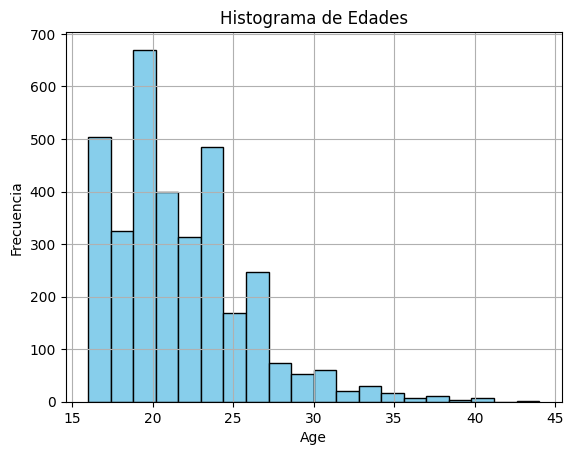

In [45]:
#Graficando las edades

plt.hist(dfp['Age'], bins=20, edgecolor='k', color='skyblue')
plt.xlabel('Age')
plt.ylabel('Frecuencia')
plt.title('Histograma de Edades')
plt.grid(True)
plt.show()

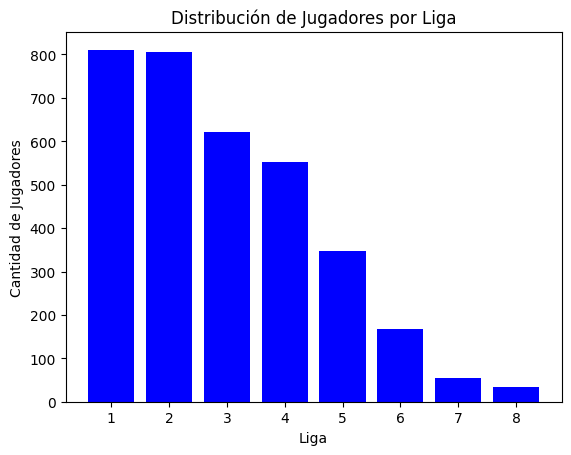

In [46]:
import matplotlib.pyplot as plt

# Calcular la cantidad de jugadores por liga
conteo_liga = dfp['LeagueIndex'].value_counts()
ligas = [1, 2, 3, 4, 5, 6, 7, 8]  # Las ligas van de 1 a 8

# Configuración del gráfico
plt.bar(ligas, conteo_liga, color='blue')
plt.xlabel('Liga')
plt.ylabel('Cantidad de Jugadores')
plt.title('Distribución de Jugadores por Liga')
plt.show()

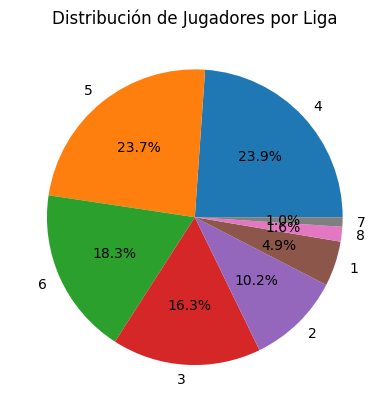

In [47]:
import matplotlib.pyplot as plt

# Calcular la cantidad de jugadores por liga
conteo_liga = dfp['LeagueIndex'].value_counts()

# Crear un gráfico de torta
plt.pie(conteo_liga, labels=conteo_liga.index, autopct='%1.1f%%')
plt.title('Distribución de Jugadores por Liga')
plt.show()

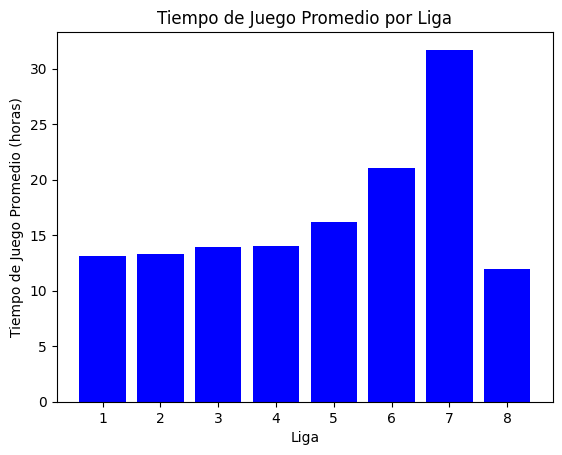

In [48]:
import matplotlib.pyplot as plt

# Calcular el tiempo de juego promedio para cada liga por semana
tiempo_juego_promedio = dfp.groupby('LeagueIndex')['HoursPerWeek'].mean()

# Crear un gráfico de barras
plt.bar(tiempo_juego_promedio.index, tiempo_juego_promedio, color='blue')
plt.xlabel('Liga')
plt.ylabel('Tiempo de Juego Promedio (horas)')
plt.title('Tiempo de Juego Promedio por Liga')
plt.show()

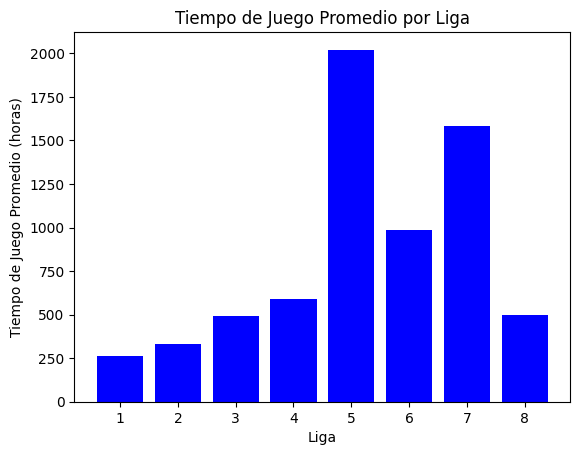

In [49]:
# Calcular el tiempo de juego promedio para cada liga en total
tiempo_juego_promedio = dfp.groupby('LeagueIndex')['TotalHours'].mean()

# Crear un gráfico de barras
plt.bar(tiempo_juego_promedio.index, tiempo_juego_promedio, color='blue')
plt.xlabel('Liga')
plt.ylabel('Tiempo de Juego Promedio (horas)')
plt.title('Tiempo de Juego Promedio por Liga')
plt.show()

## Fase 3: Data Preparation

In [51]:
# Utiliza el método drop para eliminar la columna especificada, debido a que es un dato irrelevante en nuestro análisis
dfp = dfp.drop(columns='GameID')

KeyError: "['GameID'] not found in axis"

In [52]:
!pip install fancyimpute

In [56]:
import numpy as np
from fancyimpute import SimpleFill

# Selecciona las variables con valores faltantes
variables_con_nan = ['TotalHours', 'HoursPerWeek', 'APM']

# Crea un objeto SimpleFill para imputar valores faltantes con la mediana
imputer = SimpleFill(fill_method='median')

# Imputa los valores faltantes en las variables seleccionadas
dfp[variables_con_nan] = imputer.fit_transform(dfp[variables_con_nan])

# Verifica que los valores faltantes hayan sido imputados
print(dfp[variables_con_nan].isnull().sum())

TotalHours      0
HoursPerWeek    0
APM             0
dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/fancyimpute/solver.py:55: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")


In [54]:
print("///Datos originales:///")
print(df)
print("///Datos imputados:///")
print(dfp)


///Datos originales:///
      GameID  LeagueIndex        Age  HoursPerWeek  TotalHours      APM  \
0         52            5  27.000000          10.0      3000.0  143.718   
1         55            5  23.000000          10.0      5000.0      NaN   
2         56            4  30.000000          10.0       200.0  699.612   
3         57            3  19.000000          20.0       400.0      NaN   
4         58            3  32.000000          10.0       500.0      NaN   
...      ...          ...        ...           ...         ...      ...   
3390   10089            8  21.647904           NaN         NaN      NaN   
3391   10090            8  21.647904           NaN         NaN  314.670   
3392   10092            8  21.647904           NaN         NaN      NaN   
3393   10094            8  21.647904           NaN         NaN      NaN   
3394   10095            8  21.647904           NaN         NaN      NaN   

      SelectByHotkeys  AssignToHotkeys  MinimapAttacks  MinimapRightClicks 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


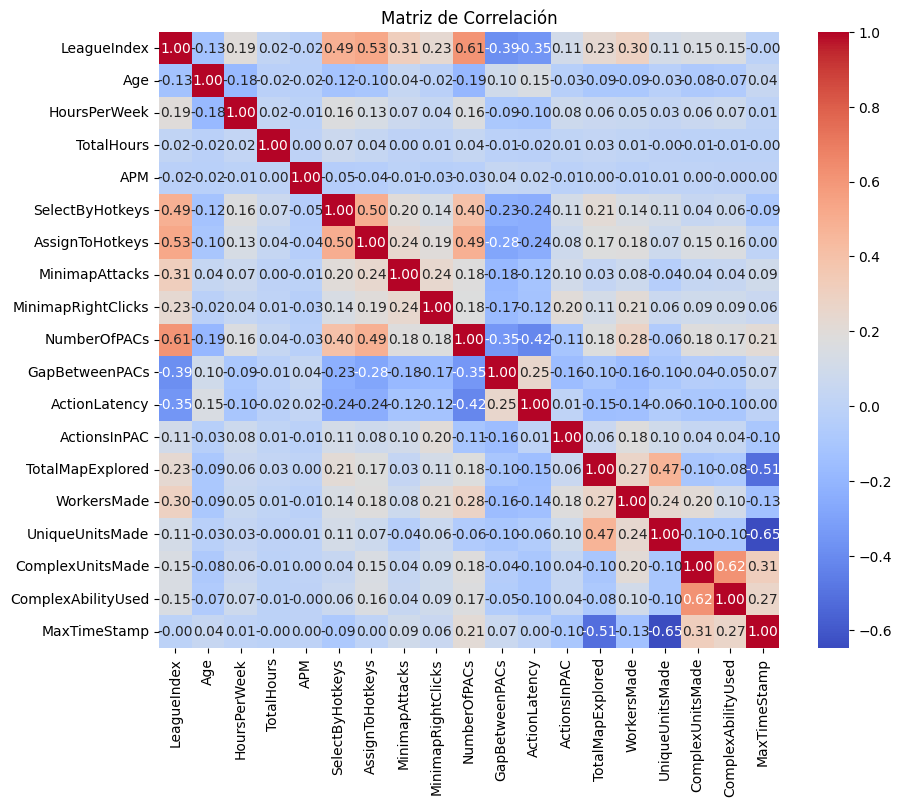

In [55]:
# Selecciona todas las variables del DataFrame
variables = dfp.columns

# Calcula la matriz de correlación
corr_matrix = dfp[variables].corr()

# Crea un mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

Con esto finalizamos las dos primeras etapas del análisis del caso usando la metodología CRISP-DM, las cuales incluyeron "Business understanding" y "Data understanding" lo que nos permitió identificar objetivos claves y KPI's relevantes encontrando patrones, correlaciones y caracteristicas importantes de los datos.

<font size="5" color="green">END</font>


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
